<a href="https://colab.research.google.com/github/ChatMadhu/Linear-Regression/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #Import the dependancies

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### #Data Collection and analysis

In [43]:
Insurance_dataset= pd.read_csv('/content/insurance.csv')

In [44]:
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
Insurance_dataset.shape

(1338, 7)

In [46]:
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 3 categorical rows
1. Sex
2. smoker
3. region

In [47]:
Insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Here the 25% means that 25% of values are less than 27 of age. And also 50% means 50% of values are less than 39 of age.
* this dta shows how the data is destibuted.

In [49]:
#to see the distribution of each columns we need to load 'set' attribute of seaborn library.
sns.set()

1. Lets check the distribution of the age column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


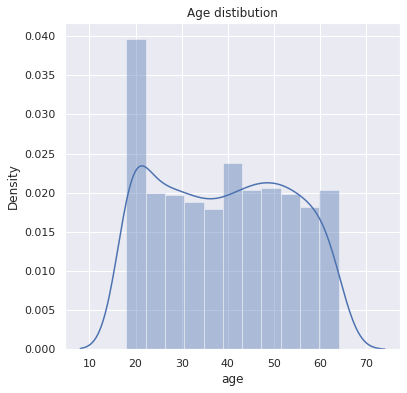

In [50]:
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['age'])
plt.title('Age distibution')
plt.show()

2. Lets check the distribution of the gender column.
for this categorical data a count plot is much better than a distribution graph.

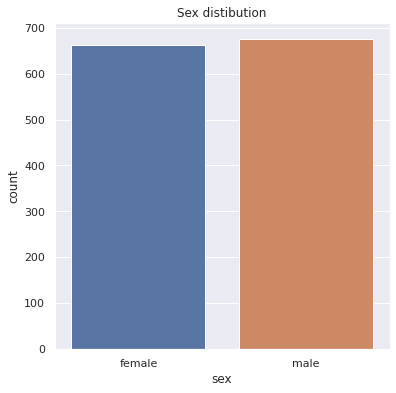

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data= Insurance_dataset)
plt.title('Sex distibution')
plt.show()

In [52]:
Insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

3. Lets check for the distibution of the BMI value.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


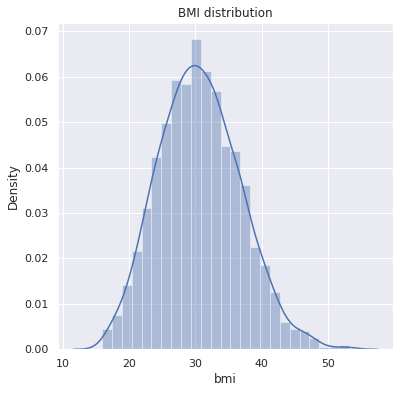

In [53]:
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI range -----> 18.5 to 24.9

4. Lets check for the distibution of having children.

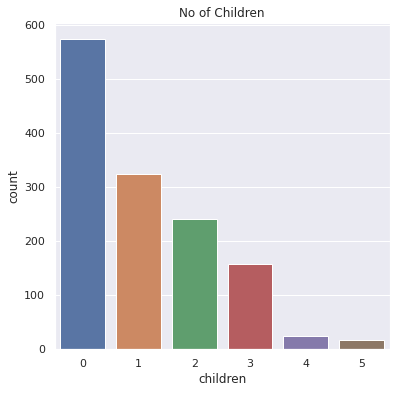

In [54]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_dataset)
plt.title('No of Children')
plt.show()

In [55]:
Insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

5. Lets check for the distibution of smoking.

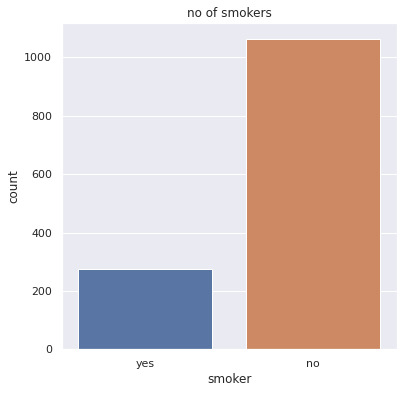

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= Insurance_dataset)
plt.title('no of smokers')
plt.show()

In [57]:
Insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

6. Lets check for the distibution of the region.

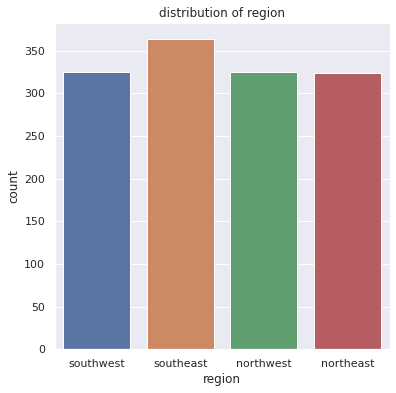

In [58]:
#region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=Insurance_dataset)
plt.title('distribution of region')
plt.show()

In [59]:
Insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

7. Lets check for the distibution of chargers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


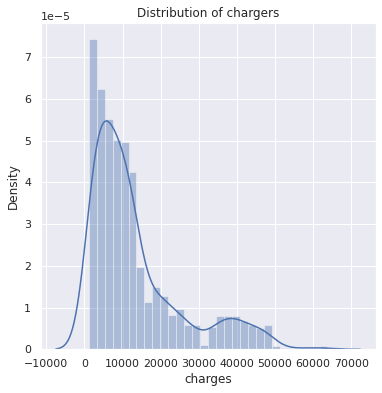

In [60]:
#charges
plt.figure(figsize=(6,6))
sns.distplot(Insurance_dataset['charges'])
plt.title('Distribution of chargers')
plt.show()

### #Data preprocessing

1. Encode the categorical features

southeast    364
southwest    325
northwest    325
northeast    324

In [61]:
Insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace= True)
Insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace= True)
Insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace= True)
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


### #Splitting dataset

1. splitting the dataset as the data and the target.

In [62]:
x=Insurance_dataset.drop(columns='charges', axis= 1)
y=Insurance_dataset['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [63]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


2. splittiing the datset into training and testing data.

In [64]:
X_test, X_train, Y_test, Y_train = train_test_split(x, y, test_size=0.2, random_state=2)

In [65]:
print(x.shape, X_train, X_test)

(1338, 6)       age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       3
1091   55    1  29.830         0       1       3
273    50    0  27.455         1       1       3
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       3
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       1       1
323    57    0  40.945         0       1       3
1337   61    1  29.070         0       0       2
1066   48    0  37.290         2       1       0
966    51    0  24.795         2       0       2

[268 rows x 6 columns]       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       3
505    37    0  30.875         3       1       2
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       3
201    48    1  32.230         1       1       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1   

### #Model selection

In [66]:
regressor = LinearRegression()

### #Model Training
1. on training data

In [67]:
regressor.fit(X_train,Y_train)

LinearRegression()

### #Model Prediction

In [68]:
training_data_prediction= regressor.predict(X_train)

### #Model Evaluation

In [74]:
#use R squared value
R2_score= metrics.r2_score(Y_train, training_data_prediction)
print(R2_score)

0.7510754156439685


2. on testing data.

In [70]:
regressor.fit(X_test, Y_test)

LinearRegression()

### # Model Prediction

In [71]:
testing_data_prediction= regressor.predict(X_test)

### # Model Evalution

In [75]:
r2_Socre= metrics.r2_score(Y_test, testing_data_prediction)
print(r2_Socre)

0.7518195459072954


# Building a predictive system

In [77]:
#tuple data type
input_data= (31,1,25.74,0,1,0)

#changing the tuple data type into numpy array
input_data_as_numpy_array= np.array(input_data)

In [78]:
#reshaping the array, since we should specify to the model that we're giving one input to be predicted, not 1000 as previously.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [80]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3632.02043291]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


The actual value is 3756.6216 which is almost near to 3632.02